(512, 512, 3)


/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


-2.168404344971009e-19
2.2149911570699954e-19
0.003918883279014679
0.007105382928160637


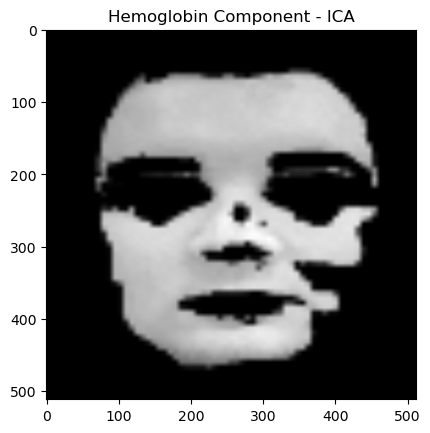

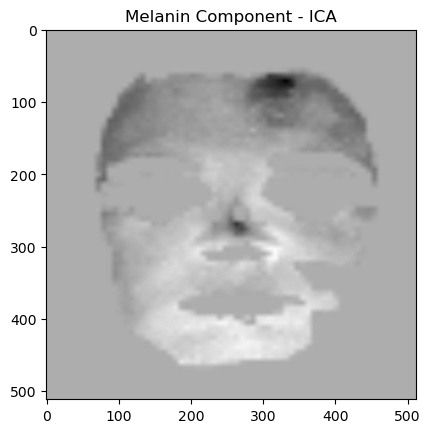

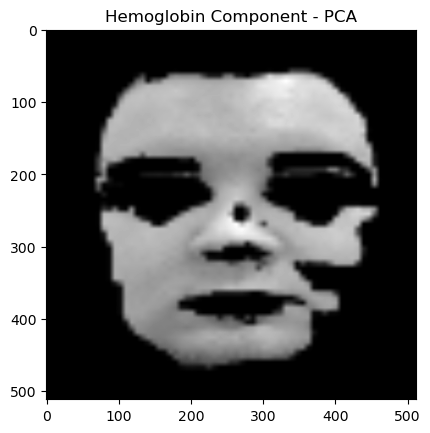

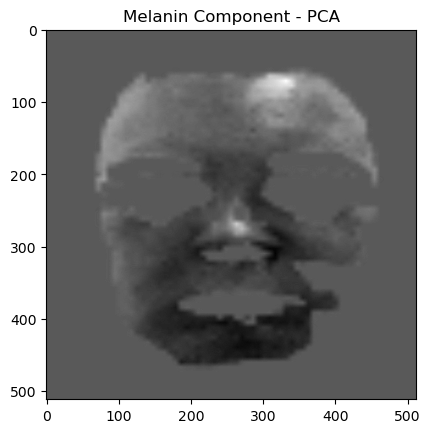

In [4]:
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture3.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/Screenshot 2023-01-30 at 5.34.46 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.37.16 PM.png"
im = cv2.imread(im_path, cv2.COLOR_BGR2YCrCb)
# # convert to YCbCr
# im = color.rgb2ycbcr(im)
#crop and resize to 1024x1024
im = cv2.resize(im, (512, 512))
print(im.shape)


# perform ICA
# ica = FastICA(n_components=3, whiten=True, random_state=0, max_iter=10000, tol=0.00001, fun='logcosh', fun_args=None, w_init=None, algorithm='parallel')
ica = FastICA(n_components=2, whiten=True, random_state=0, max_iter=10000, tol=0.000001, fun_args=None, w_init=None, algorithm= 'deflation',fun='logcosh')
im = im.reshape((im.shape[0] * im.shape[1], 3))
S = ica.fit_transform(im)

#pefrom PCA 
pca = PCA(n_components=3, whiten=True, random_state=0, svd_solver='auto', tol=0.0, iterated_power='auto')
pca.fit(im)
S_pca = pca.transform(im)
hem = S_pca[:,0]
mel = S_pca[:,1]
hem = np.reshape(hem, (512, 512))
mel = np.reshape(mel, (512, 512))

# separate the hemoglobin and melanin components
hemoglobin_component = S[:,0]


melanin_component = S[:,1]
height = 512
width = 512
hemoglobin_component = np.reshape(hemoglobin_component, (height, width))
melanin_component = np.reshape(melanin_component, (height, width))


# apply the mask to the image
print(np.mean(hemoglobin_component))
print(np.mean(melanin_component))
#max
print(np.max(hemoglobin_component))
print(np.max(melanin_component))





# plt.imshow(hemoglobin_component, cmap='binary')
# plt.show()
# plt.imshow(melanin_component, cmap='binary')
# plt.show()

#show rgb masks
plt.imshow(hemoglobin_component, cmap='gray')
plt.title('Hemoglobin Component - ICA')
plt.show()
plt.imshow(melanin_component, cmap='gray')
plt.title('Melanin Component - ICA')
plt.show()
plt.imshow(hem, cmap='gray')
plt.title('Hemoglobin Component - PCA')
plt.show()
plt.imshow(mel, cmap='gray')
plt.title('Melanin Component - PCA')
plt.show()


libpng warning: iCCP: known incorrect sRGB profile
/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


(512, 512, 3)
282.5842683698882
-8.215650382226158e-14
351.94560179774095
22.396867279315952


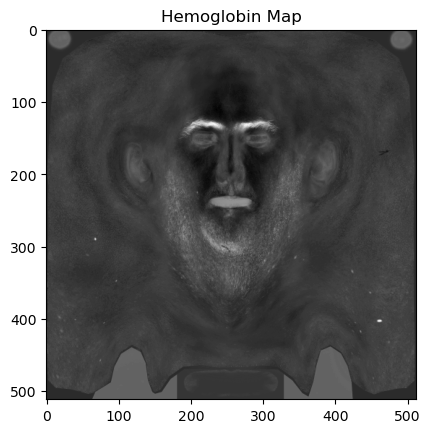

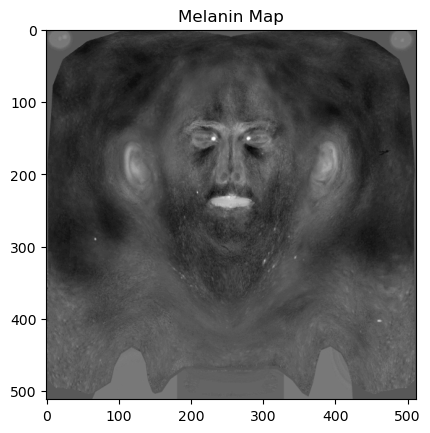

In [2]:
# from sklearn.decomposition import FastICA
# from skimage import color, data
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# import mediapipe as mp
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture.jpg"
im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.40.55 PM.png"
im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Head_02_Albedo.png"
im = cv2.imread(im_path, cv2.COLOR_BGR2YCrCb)
#crop and resize to 1024x1024
im = cv2.resize(im, (512, 512))
print(im.shape)


# perform ICA
ica = FastICA(n_components=2, whiten=False, random_state=0, max_iter=1000, tol=0.0001, fun_args=None, w_init=None, algorithm= 'deflation',fun='logcosh')
im = im.reshape((im.shape[0] * im.shape[1], 3))
S = ica.fit_transform(im)

# separate the hemoglobin and melanin components
hemoglobin_component = S[:,0]
melanin_component = S[:,1]
hemoglobin_component = np.reshape(hemoglobin_component, (512, 512))
melanin_component = np.reshape(melanin_component, (512, 512))

# apply the mask to the image
print(np.mean(hemoglobin_component))
print(np.mean(melanin_component))
#max
print(np.max(hemoglobin_component))
print(np.max(melanin_component))

#show rgb masks
plt.imshow(hemoglobin_component, cmap = 'binary')
plt.title('Hemoglobin Map')
plt.show()
plt.imshow(melanin_component, cmap='binary')
plt.title('Melanin Map')
plt.show()

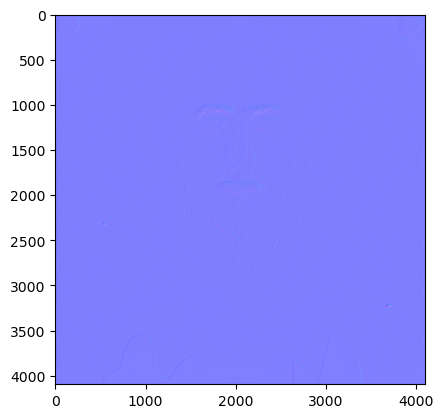

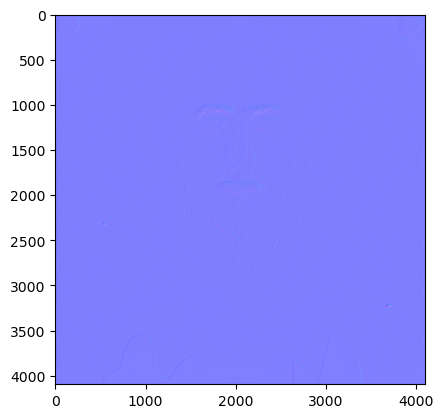

In [7]:
def GenerateNormalMap(path):
    im = Image.open(path)
    im = ImageOps.grayscale(im)
    im = np.array(im)
    im = im.astype(np.float32)
    im = im / 255.0
    im = ndimage.gaussian_filter(im, sigma=1)
    dx = ndimage.sobel(im, 0)  # horizontal derivative
    dy = ndimage.sobel(im, 1)  # vertical derivative
    dz = np.ones_like(dx)
    norm = np.sqrt(dx**2 + dy**2 + dz**2)
    dx, dy, dz = dx / norm, dy / norm, dz / norm
    dx = (dx + 1) / 2.0 
    dy = (dy + 1) / 2.0
    dz = (dz + 1) / 2.0 
    normal_map = np.dstack((dx, dy, dz))
    normal_map = (normal_map * 255).astype(np.uint8)
    return normal_map



def RGB_Get_Normal(R,G,B):
    X = (R/255.0)*2.0-1.0
    Y = (G/255.0)*2.0-1.0
    Z = (B/255.0)*2.0-1.0
    return X,Y,Z
def Normal_Get_RGB(X,Y,Z):
    R = int((X+1.0)*255.0/2.0)
    G = int((Y+1.0)*255.0/2.0)
    B = int((Z+1.0)*255.0/2.0)
    return R,G,B

# get patches with normal between +/-10 degrees
def GetPatches(min,max, image_path):
    
    # image = Image.open(image_path)
    # convert to normal map
    normalMap = GenerateNormalMap(image_path)
    normalMap = np.array(normalMap)
    # get the image size
    width, height = normalMap.size
    # get the pixel map
    pixels = Normal_Get_RGB(normalMap)
    # loop over the image
    for x in range(width):
        for y in range(height):
            # get the RGB values
            R, G, B = pixels[x, y]
            # convert to normal
            X, Y, Z = RGB_Get_Normal(R, G, B)
            # get the angle
            angle = math.degrees(math.acos(Z))
            # check the angle
            if angle < min or angle > max:
                # set to black
                pixels[x, y] = (0, 0, 0)
    # show the image
    # normalMap.show()
    return normalMap




image_path =f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg"
albedo_path = f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Head_02_Albedo.png"

normal_map = GenerateNormalMap(albedo_path)
plt.imshow(normal_map)
plt.show()

albedo_normal_map = GenerateNormalMap(albedo_path)
albedo_normal_map = albedo_normal_map
plt.imshow(albedo_normal_map)
plt.show()



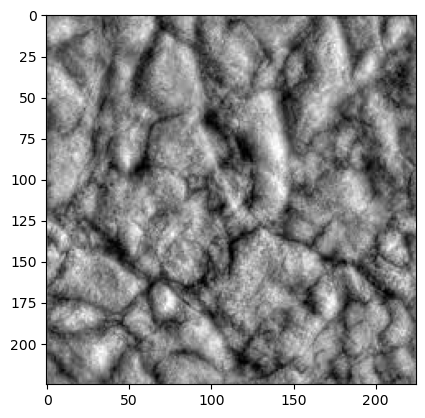

max pixel value: 255
min pixel value: 0
bump_map size: (225, 225)


In [10]:
from PIL import Image
import numpy as np

# Open the bump map image
bump_map = Image.open(f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg").convert("L")

# Convert the image to a numpy array
bump_data = np.array(bump_map)

# Create an empty normal map image with the same dimensions as the bump map
normal_map = Image.new("RGB", bump_map.size)
normal_data = np.array(normal_map)

# Get the width and height of the image
width, height = bump_map.size

# Iterate over each pixel in the bump map
for x in range(width):
    for y in range(height):
        # Get the bump value of the current pixel
        bump = bump_data[x, y]
        
        # Convert the bump value to a normal vector
        normal = (bump / 255.0) * 2.0 - 1.0
        
        # Set the normal vector as the color of the corresponding pixel in the normal map
        normal_data[x, y] = (normal, normal, 255)

# Convert the normal map numpy array back to an image
normal_map = Image.fromarray(normal_data)
#show normal map
plt.imshow(bump_data, cmap='gray')
plt.show()
# Save the normal map
normal_map.save("normal_map.jpg")
print(f"max pixel value: {np.max(normal_data)}")
print(f"min pixel value: {np.min(normal_data)}")

#use autograd to get the gradient of the bump map
# !pip3 install autograd

# import autograd.numpy as np
# from autograd import grad
# from autograd import elementwise_grad
# from autograd import jacobian
# from autograd import hessian
# from autograd import value_and_grad
# from autograd import grad_and_aux

import autograd.numpy as np
from autograd import grad

# Open the bump map image
bump_map = Image.open(f"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/download.jpeg").convert("L")
print(f"bump_map size: {bump_map.size}")
# Convert the image to a numpy array
bump_data = np.array(bump_map)
# Create an empty normal map image with the same dimensions as the bump map
# normal_map = []
# normal_data = []
row_grad = []
col_grad = []
# Get the width and height of the image
width, height = bump_map.size

for row in range(bump_data.shape[0]):
    col_grad
    # print(f"row: {row}")
    for col in range(bump_data.shape[1]):
        # print(" ",col)
        #get gradient of row
        row_g = grad(bump_data[row, col])
      
        
    # for col in range(bump_data.shape[1]):

    



-1.0 1.0 1.0


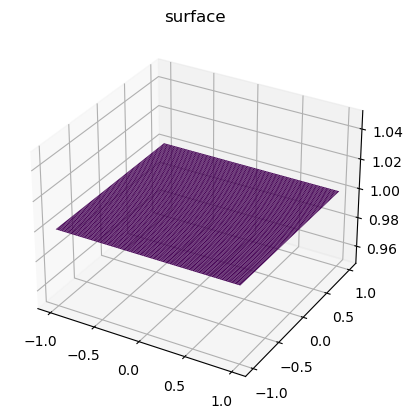

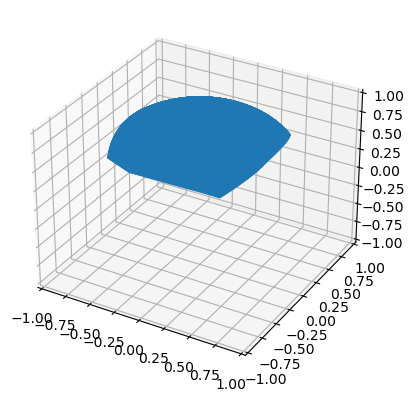

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def get_normal(pixel):
    x = (pixel[0]/255.0)*2.0-1.0
    y = (pixel[1]/255.0)*2.0-1.0
    z = (pixel[2]/255.0)*2.0-1.0
    return x,y,z

pixel = (0, 255, 255)
x,y,z = get_normal(pixel)
print(x,y,z)
#mesh of the normal map
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = np.ones_like(x)

#plot the normal map and
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')
# plt.show()


#vector plot
x = np.asarray([x])
y = np.asarray([y])
z = np.asarray([z])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D axis
#plot mesh and normal vectors
fig = plt.figure()

# Define x, y values
x = y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Define z values
Z = 4*X + Y**2

# Plot the surface
ax.plot_surface(X, Y, Z)


ax.quiver(0, 0, 0, x, y, z, length=1, normalize=True)


# Show the plot
plt.show()




<Figure size 640x480 with 0 Axes>

0.09803921568627437 1.0 0.9367440611151255
0.0980392156862744 0.999999999999999 0.9430628825345898
0.09803921568627444 0.999999999999999 0.9441742118370771
0.09803921568627447 0.999999999999999 0.9445064215753214
0.0980392156862745 0.999999999999999 0.9445898700895353
0.09803921568627452 0.999999999999999 0.9446050013581168
0.09803921568627455 0.999999999999999 0.944611106800615
0.09803921568627458 0.999999999999999 0.944611106800615
0.0980392156862746 0.999999999999999 0.944611106800615
0.09803921568627463 0.999999999999999 0.9446111068006151


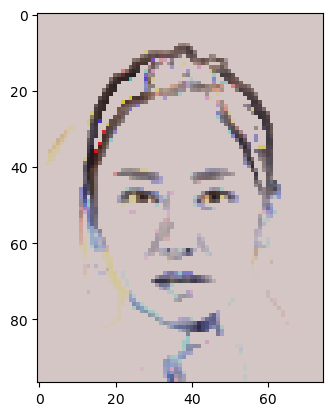

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns
import scipy
import os

cmap = {0: 'gray', 1: 'Greens', 2: 'Blues'}


def adaptive_threshold(in_image):
    m, n = in_image.shape
    in_image.shape[0]
    s = int(max(m, n)/8)
    t = 5
    output_image = np.zeros(in_image.shape, dtype='float')

    integral_image = np.zeros(in_image.shape)
    '''
    for i in range(m):
        sum_ = 0
        for j in range(n):
            sum_ += in_image[i][j]
            if i == 0:
                integral_image[i][j] = sum_
            else:
                integral_image[i][j] = integral_image[i-1][j]+sum_
    '''
    integral_image = cv2.integral(in_image)

    i_s = np.indices((m, 1))[0]
    j_s = np.indices((n, 1))[0]
    i1_s = i_s-s//2
    i2_s = i_s+s//2
    j1_s = j_s-s//2
    j2_s = j_s+s//2

    i1_s = np.clip(i1_s, 0, m-1)
    i2_s = np.clip(i2_s, 0, m-1)
    j1_s = np.clip(j1_s, 0, n-1)
    j2_s = np.clip(j2_s, 0, n-1)

    counts = (i2_s-i1_s)*(j2_s-j1_s).T
    # print(counts)
    sums = (integral_image[i2_s, j2_s.T]+integral_image[i1_s, j1_s.T] -
            integral_image[i2_s, j1_s.T]-integral_image[i1_s, j2_s.T])

    output_image = np.where(in_image*counts >= sums*(100-t)/100, 1, 0)

    return output_image


def remove_shadow(original_image, n_iters=10):
    # adaptive_threshold(original_image.mean(axis=-1))
    # return original_image

    epsilon = 1e-15
    dx = dy = 5
    m, n, c = original_image.shape
    filterconv = np.ones((dx, dy))
    reflectance = original_image.copy()
    reflectance = reflectance/255
    shading = np.zeros(original_image.shape)
    masks = [np.zeros((m, n)) for _ in range(c)]

    for t in range(n_iters):
        for i in range(3):
            # mask = cv2.adaptiveThreshold(
            #   (reflectance[:, :, i]*255).astype('uint8'), 1, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)
            mask = adaptive_threshold(
                (reflectance[:, :, i]*255).astype('uint8'))
            if t == -1:
                mask = cv2.dilate((mask*255).astype('uint8'),
                                  cv2.getStructuringElement(
                                      cv2.MORPH_ELLIPSE, (1, 1))
                                  ).astype('uint8')/255
            masks[i] = mask

            conv_img_mask = scipy.signal.convolve2d(
                reflectance[:, :, i]*mask, filterconv, mode='same')
            conv_mask = scipy.signal.convolve2d(mask, filterconv, mode='same')

            shading[:, :, i] = conv_img_mask/(conv_mask+epsilon)

            shading[:, :, i] = np.where(mask == 1, reflectance[:, :, i],
                                        shading[:, :, i])
            # plt.figure()
            # plt.imshow(shading)
            reflectance[:, :, i] = (
                reflectance[:, :, i] / (shading[:, :, i]+epsilon))
            #reflectance[:, :, i] /= (shading+epsilon)
            reflectance[:, :, i] = np.clip(reflectance[:, :, i], 0, 1)
            # reflectance[:,:,i]=reflectance[:,:,i]/reflectance[:,:,i].max()
        print(reflectance.min(), reflectance.max(), reflectance.mean())

        # plt.figure()
        # plt.imshow(reflectance, cmap='gray')
        # plt.title('reflectance')
    gm = np.zeros((c))
    output_image = reflectance

    for i in range(c):
        _, shadow_mask = cv2.threshold(
            (shading[:, :, i]*255).astype('uint8'),
            0, 255,
            cv2.THRESH_OTSU+cv2.THRESH_BINARY)
        shadow_mask = shadow_mask/255
        gm[i] = ((original_image[:, :, i]*masks[i] *
                 shadow_mask).sum()/(masks[i]*shadow_mask).sum())

        output_image[:, :, i] = reflectance[:, :, i]*gm[i]
        output_image = output_image.astype('uint8')

    return output_image


path = r'D:\personal projects\OCR\Shadow removal\Water-Filling-master\Water-Filling-master\Original'

i = 0
for root, dirs, files in os.walk(path):
    for file in files:
        if ('.png' in file) or ('.jpg' in file) or ('.bmp' in file):
            img = cv2.imread(os.path.join(root, file))

            output_image = remove_shadow(img)
            fig = plt.figure()
            plt.subplot(1, 2, 1)
            plt.title('input_image')
            plt.imshow(img)
            plt.subplot(1, 2, 2)
            plt.title('output_image')
            plt.imshow(output_image)
            fig.savefig(os.path.join(
                r'D:\personal projects\OCR\Shadow removal\water-filling-python-main\outputs', str(i)+'_iterative.jpg'))

            plt.close('all')
            i += 1

# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture3.jpg"
im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/Screenshot 2023-01-30 at 5.34.46 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.37.16 PM.png"

im = cv2.imread(im_path, cv2.COLOR_BGR2YCrCb)
im_no_shadow = remove_shadow(im)
#convert to RGB

plt.imshow(im_no_shadow)
plt.show()


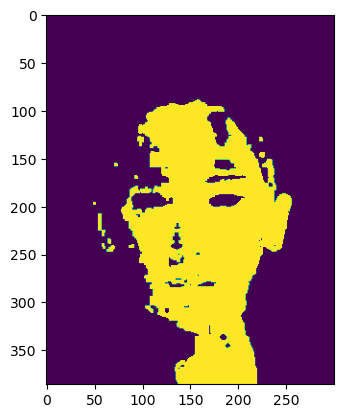

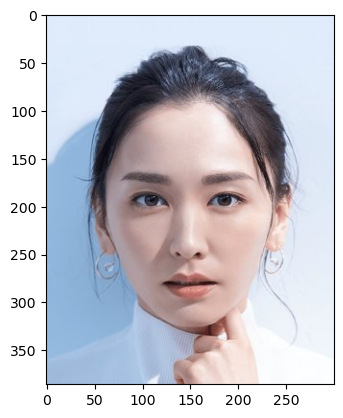

0.0 1.0 0.9769006729524138
0.0 0.999999999999999 0.9786353454367422
0.0 0.999999999999999 0.9791247103333109
0.0 0.999999999999999 0.9792891993050908
0.0 0.999999999999999 0.9793448120823661
0.0 0.999999999999999 0.9793704401142671
0.0 0.999999999999999 0.9793786585030647
0.0 0.999999999999999 0.9793819941907349
0.0 0.999999999999999 0.9793832884384984
0.0 0.999999999999999 0.9793840232400346


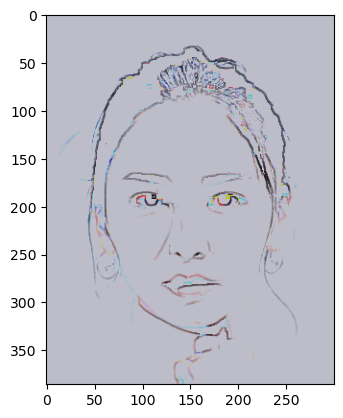

In [13]:
import cv2
import numpy as np
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/Screenshot 2023-01-30 at 5.34.46 PM.png"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture3.jpg"
im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/Screenshot 2023-01-30 at 5.34.46 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.37.16 PM.png"
#Open a simple image
img = cv2.imread(im_path)
#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)
#apply the global mask to the image to extract the skin
# img = cv2.bitwise_and(img, img, mask=global_mask)

# plt.imshow(HSV_result)
# plt.show()
plt.imshow(HSV_mask)
plt.show()
#convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()




/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Color Information
{'cluster_index': 2,
 'color': [220.91286102197083, 187.58084423599172, 180.06171315724632],
 'color_percentage': 0.17245082037625634}

{'cluster_index': 6,
 'color': [232.4848942598192, 206.54028197381663, 200.90684793555005],
 'color_percentage': 0.17043209346276092}

{'cluster_index': 1,
 'color': [174.09259259259397, 141.8612415232136, 139.06390193009975],
 'color_percentage': 0.163302121810841}

{'cluster_index': 0,
 'color': [244.11111111111077, 225.64407230196585, 220.40111642743358],
 'color_percentage': 0.1631303152650116}

{'cluster_index': 4,
 'color': [200.75318896470012, 166.71462474043395, 161.64995550281893],
 'color_percentage': 0.14423159522377801}

{'cluster_index': 5,
 'color': [152.9012145748984, 118.78663967611337, 116.06275303643713],
 'color_percentage': 0.10780860750794605}

{'cluster_index': 3,
 'color': [119.66611433305701, 87.5111847555923, 85.56835128417562],
 'color_percentage': 0.052143286659221716}

{'cluster_index': 7,
 'color': [75.265

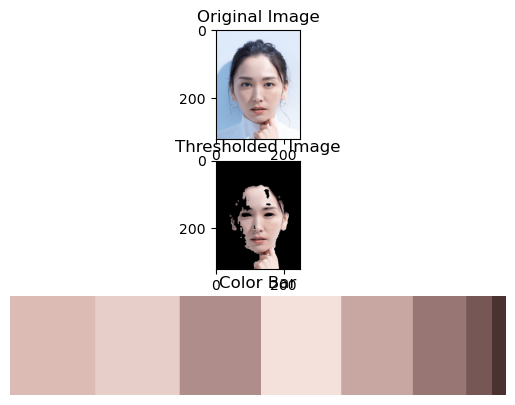

[{'cluster_index': 2, 'color': [220.91286102197083, 187.58084423599172, 180.06171315724632], 'color_percentage': 0.17245082037625634}, {'cluster_index': 6, 'color': [232.4848942598192, 206.54028197381663, 200.90684793555005], 'color_percentage': 0.17043209346276092}, {'cluster_index': 1, 'color': [174.09259259259397, 141.8612415232136, 139.06390193009975], 'color_percentage': 0.163302121810841}, {'cluster_index': 0, 'color': [244.11111111111077, 225.64407230196585, 220.40111642743358], 'color_percentage': 0.1631303152650116}, {'cluster_index': 4, 'color': [200.75318896470012, 166.71462474043395, 161.64995550281893], 'color_percentage': 0.14423159522377801}, {'cluster_index': 5, 'color': [152.9012145748984, 118.78663967611337, 116.06275303643713], 'color_percentage': 0.10780860750794605}, {'cluster_index': 3, 'color': [119.66611433305701, 87.5111847555923, 85.56835128417562], 'color_percentage': 0.052143286659221716}, {'cluster_index': 7, 'color': [75.26504065040646, 49.59349593495936, 

In [14]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import imutils
import pprint
from matplotlib import pyplot as plt


def extractSkin(image):
    # Taking a copy of the image
    img = image.copy()
    # Converting from BGR Colours Space to HSV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
    lower_threshold = np.array([0, 15, 0], dtype=np.uint8)
    upper_threshold = np.array([17,170,255], dtype=np.uint8)
    # Defining HSV Threadholds
    # lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    # upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask = cv2.inRange(img, lower_threshold, upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    # Extracting skin from the threshold mask
    skin = cv2.bitwise_and(img, img, mask=skinMask)

    # Return the Skin image
    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)


def removeBlack(estimator_labels, estimator_cluster):

    # Check for black
    hasBlack = False

    # Get the total number of occurance for each color
    occurance_counter = Counter(estimator_labels)

    # Quick lambda function to compare to lists
    def compare(x, y): return Counter(x) == Counter(y)

    # Loop through the most common occuring color
    for x in occurance_counter.most_common(len(estimator_cluster)):

        # Quick List comprehension to convert each of RBG Numbers to int
        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        # Check if the color is [0,0,0] that if it is black
        if compare(color, [0, 0, 0]) == True:
            # delete the occurance
            del occurance_counter[x[0]]
            # remove the cluster
            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurance_counter, estimator_cluster, hasBlack)


def getColorInformation(estimator_labels, estimator_cluster, hasThresholding=False):

    # Variable to keep count of the occurance of each color predicted
    occurance_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurance, cluster, black) = removeBlack(
            estimator_labels, estimator_cluster)
        occurance_counter = occurance
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurance_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurances
    totalOccurance = sum(occurance_counter.values())

    # Loop through all the predicted colors
    for x in occurance_counter.most_common(len(estimator_cluster)):

        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index-1) if ((hasThresholding & hasBlack)
                              & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1]/totalOccurance)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color,
                     "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extractDominantColor(image, number_of_colors=8, hasThresholding=True):

    # Quick Fix Increase cluster counter to neglect the black(Read Article)
    if hasThresholding == True:
        number_of_colors += 1

    # Taking Copy of the image
    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img, sample_weight=None)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0),
                      (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar


"""## Section Two.4.2 : Putting it All together: Pretty Print
The function makes print out the color information in a readable manner
"""


def prety_print_data(color_info):
    for x in color_info:
        print(pprint.pformat(x))
        print()


"""
The below lines of code, is the implementation of the above defined function.
"""

'''
Skin Image Primary : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/82764696-open-palm-hand-gesture-of-male-hand_image_from_123rf.com.jpg
Skin Image One     : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin.jpg
Skin Image Two     : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin_2.jpg
Skin Image Three   : https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/Human-Hands-Front-Back-Image-From-Wikipedia.jpg
'''


# Get Image from URL. If you want to upload an image file and use that comment the below code and replace with  image=cv2.imread("FILE_NAME")
#get image from path
im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060047_4_027403_MALE_25.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/Python_CG_Skin/py_skin/jan2_segmentation_FaceOnly/Face_Segments/img/060019_4_028457_MALE_33.jpg"
image = cv2.imread(im_path)
#convert to imutils image

# Resize image to a width of 250
image = imutils.resize(image, width=250)

# Show image
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
# plt.show()

# Apply Skin Mask
skin = extractSkin(image)

plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.title("Thresholded  Image")
# plt.show()

# Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors
dominantColors = extractDominantColor(skin, hasThresholding=True)

# Show in the dominant color information
print("Color Information")
prety_print_data(dominantColors)

# Show in the dominant color as bar
print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.subplot(3, 1, 3)
plt.axis("off")
plt.imshow(colour_bar)
plt.title("Color Bar")

plt.show()

print(dominantColors)

/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


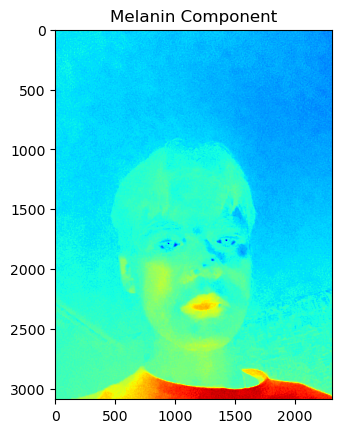

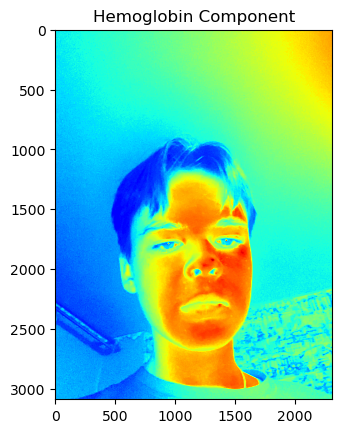

In [10]:
# skin =cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)
im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060038_4_028466_MALE_19.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/Screenshot 2023-01-30 at 5.34.46 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.37.16 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Screenshot 2023-01-25 at 4.40.55 PM.png"
# im_path =r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/Head_02_Albedo.png"
# im_path = r"/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/results/texture.jpg"
# skin = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
img = cv2.imread(im_path)
#crop image around face using mediapipe
# img = extractSkin(img)

ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Flatten the image into a 2D array
data = ycrcb.reshape(-1, 3)

# Initialize the ICA model
ica = FastICA(n_components=2,max_iter=100000, tol=0.000001, random_state=0)

# Fit the ICA model to the data
ica.fit(data)

# Get the independent components
components = ica.transform(data)

# Extract the melanin and hemoglobin components
melanin_component = components[:, 1]
hemoglobin_component = components[:, 0]

# Reshape the components back into the original image shape
melanin_component = melanin_component.reshape(*ycrcb.shape[:2])
hemoglobin_component = hemoglobin_component.reshape(*ycrcb.shape[:2])
#plot melannin as brown and hemoglobin as jet

plt.imshow(melanin_component, cmap='jet')
plt.title("Melanin Component")
plt.show()
plt.imshow(hemoglobin_component, cmap='jet')
plt.title("Hemoglobin Component")
plt.show()

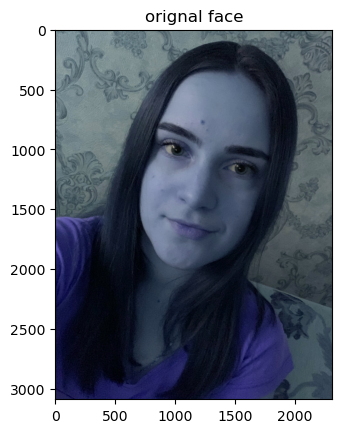

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


630 757 1270 1269
landmark {
  x: 0.5254658
  y: 0.4346123
  z: -2.4650977
  visibility: 0.99981815
}
landmark {
  x: 0.62298006
  y: 0.3696282
  z: -2.371208
  visibility: 0.9996865
}
landmark {
  x: 0.6634878
  y: 0.37820765
  z: -2.3719282
  visibility: 0.9996425
}
landmark {
  x: 0.6982245
  y: 0.38617516
  z: -2.3725915
  visibility: 0.9996075
}
landmark {
  x: 0.4826215
  y: 0.33684564
  z: -2.3768966
  visibility: 0.99973124
}
landmark {
  x: 0.4394508
  y: 0.32627082
  z: -2.376037
  visibility: 0.9997156
}
landmark {
  x: 0.40291935
  y: 0.31867754
  z: -2.3768735
  visibility: 0.9996897
}
landmark {
  x: 0.7532091
  y: 0.43047118
  z: -1.5147357
  visibility: 0.99960405
}
landmark {
  x: 0.35427016
  y: 0.33993176
  z: -1.5149046
  visibility: 0.9997985
}
landmark {
  x: 0.5648669
  y: 0.535215
  z: -2.1266775
  visibility: 0.9998895
}
landmark {
  x: 0.42352575
  y: 0.50911796
  z: -2.1291366
  visibility: 0.99991953
}
landmark {
  x: 0.80721664
  y: 0.822217
  z: -0.9049036

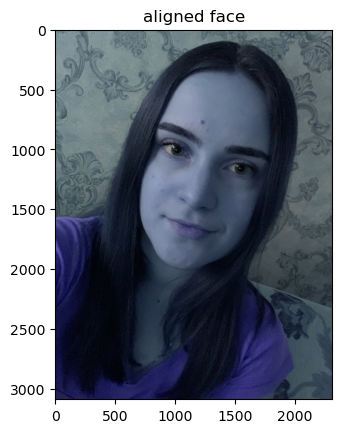

(1269, 1270, 3)


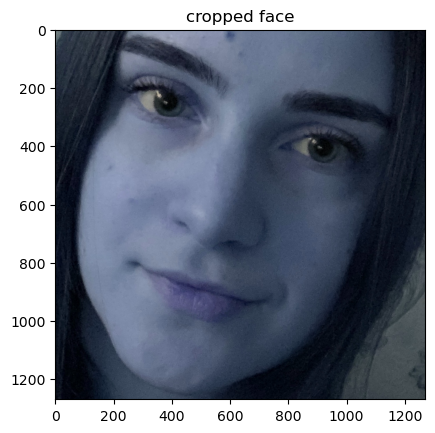

In [15]:
import cv2
import mediapipe as mp

#crop and align face
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_rotation = mp.solutions
# im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060040_4_015000_FEMALE_39.jpg"
im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060043_4_028470_FEMALE_19.jpg"
# For static images:
image = cv2.imread(im_path)
plt.imshow(image)
plt.title("orignal face")
plt.show()


# Load the face detection calculator graph.
face_detection_calculator = mp_face_detection.FaceDetection()
# Run the face detection calculator.
faces = face_detection_calculator.process(image)


# Crop the image based on the face detection results.
box = faces.detections[0].location_data.relative_bounding_box
x = box.xmin
x = int(x * image.shape[1])
y = box.ymin
y = int(y * image.shape[0])
w = box.width
w = int(w * image.shape[1])
h = box.height
h = int(h * image.shape[0])
print(x,y,w,h)
#align face
pose = mp_pose.Pose()
results = pose.process(image)

#convert aligned face to image
print(results.pose_landmarks)
#show aligned face
plt.imshow(image)
plt.title("aligned face")
plt.show()
#crop 
image = image[y:y+h, x:x+w]
print(image.shape)
plt.imshow(image)
plt.title("cropped face")
plt.show()



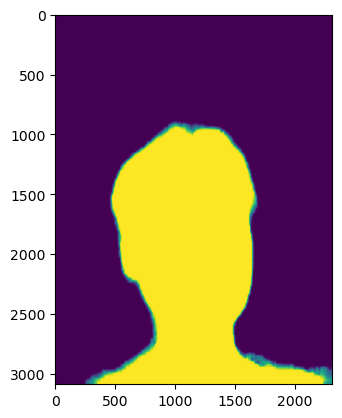

[[3.9251901e-26 3.9251901e-26 3.9251901e-26 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.9251901e-26 3.9251901e-26 3.9251901e-26 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.9251901e-26 3.9251901e-26 3.9251901e-26 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [9.0603693e-17 9.0603693e-17 9.0603693e-17 ... 8.4888905e-01
  8.4888905e-01 8.4888905e-01]
 [9.0603693e-17 9.0603693e-17 9.0603693e-17 ... 8.4888905e-01
  8.4888905e-01 8.4888905e-01]
 [9.0603693e-17 9.0603693e-17 9.0603693e-17 ... 8.4888905e-01
  8.4888905e-01 8.4888905e-01]]


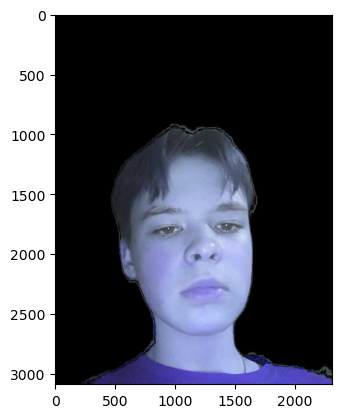

614 1592 1074 1074


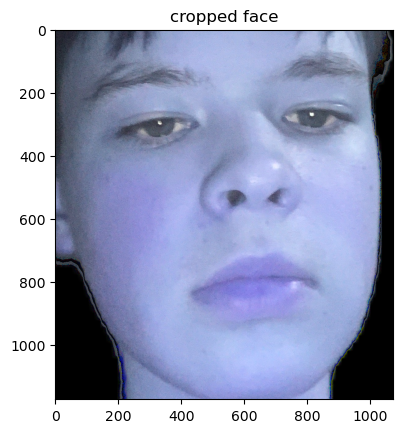

(1174, 1074, 3)


/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:729: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  self._fit_transform(X, compute_sources=False)


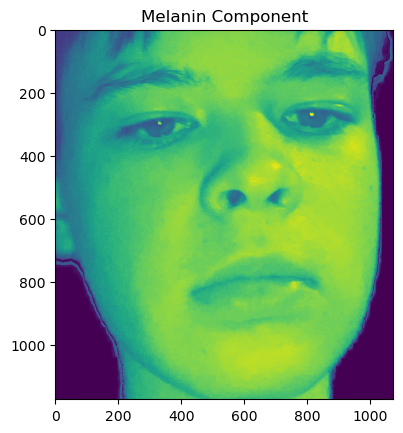

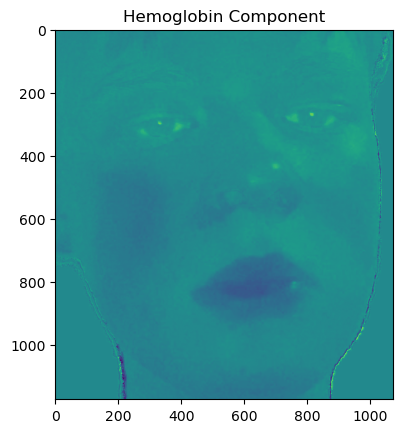

In [57]:
import skimage
import cv2
import mediapipe as mp
from mediapipe.python.solutions import selfie_segmentation, drawing_utils, face_mesh
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA
im_path = "/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060043_4_028470_FEMALE_19.jpg"
# im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060040_4_015000_FEMALE_39.jpg"
im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060038_4_028466_MALE_19.jpg"
image = cv2.imread(im_path)

# Load the face detection calculator graph.
face_detection_calculator = mp_face_detection.FaceDetection()
# Run the face detection calculator.
faces = face_detection_calculator.process(image)

mp_selfie_segmentation = mp.solutions.selfie_segmentation
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)
#show face only
f = selfie_segmentation.process(image)
fim = f.segmentation_mask[:,:,np.newaxis]
plt.imshow(fim)
plt.show()
RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# get the result
results = selfie_segmentation.process(RGB)
# extract segmented mask
mask = results.segmentation_mask
print(mask)
# apply mask to the original image
mask = np.stack((mask,)*3, axis=-1)
mask = mask * 255
mask = mask.astype(np.uint8)
# apply mask to the original image
masked_image = cv2.bitwise_and(image, mask)
# save the result
plt.imshow(masked_image)
plt.show()
#crop align face
faces = face_detection_calculator.process(image)
# Crop the image based on the face detection results.

box = faces.detections[0].location_data.relative_bounding_box
box = faces.detections[0].location_data.relative_bounding_box
x = box.xmin
x = int(x * image.shape[1])
y = box.ymin
y = int(y * image.shape[0])
w = box.width
w = int(w * image.shape[1])
h = box.height
h = int(h * image.shape[0])
print(x,y,w,h)

h = int(h+100)
y = int(y-100)
face = masked_image[y:y+h, x:x+w]
plt.imshow(face)
plt.title("cropped face")
plt.show()



#verify face is in BGR
print(face.shape)
#get color components
ycrcb = cv2.cvtColor(face, cv2.COLOR_BGR2YCrCb)
# Flatten the image into a 2D array
data = ycrcb.reshape(-1, 3)
# Initialize the ICA model
ica = FastICA(n_components=2,max_iter=100000, tol=0.000001, random_state=0, algorithm='parallel', whiten=True, fun='cube', fun_args=None)
# Fit the ICA model to the data
ica.fit(data)
# Get the independent components
components = ica.transform(data)
# Extract the melanin and hemoglobin components
melanin_component = components[:, 0]
hemoglobin_component = components[:,1]
# Reshape the components back into the original image shape
melanin_component = melanin_component.reshape(*ycrcb.shape[:2])
hemoglobin_component = hemoglobin_component.reshape(*ycrcb.shape[:2])
#plot melannin as brown and hemoglobin as jet

plt.imshow(melanin_component)
plt.title("Melanin Component")
plt.show()
plt.imshow(hemoglobin_component)    
plt.title("Hemoglobin Component")
plt.show()


614 1592 1074 1074
Nose coordinates: (1262.401428937912, 1997.882116317749)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
25

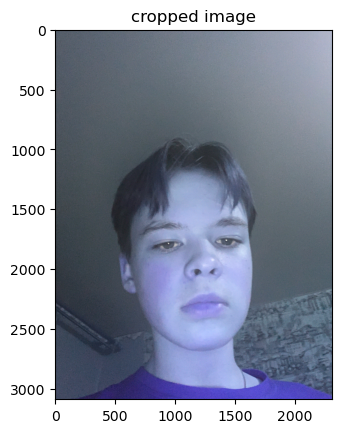

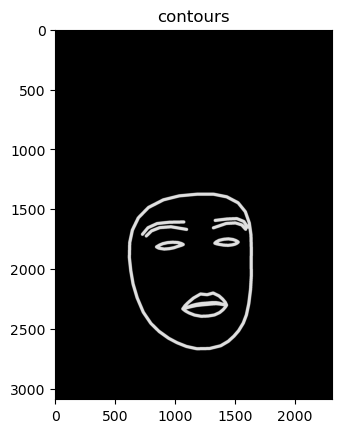

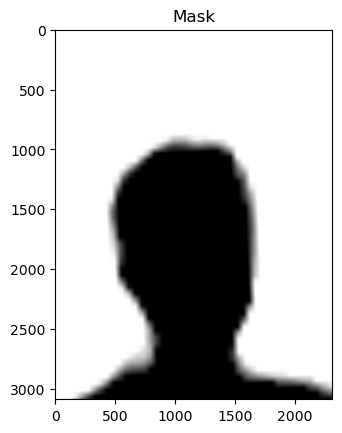

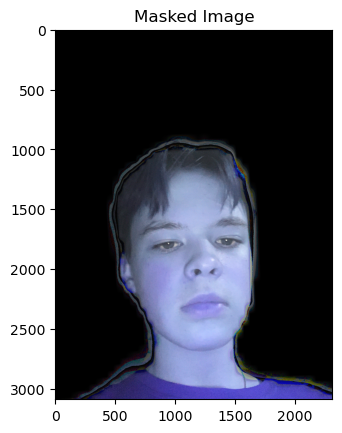

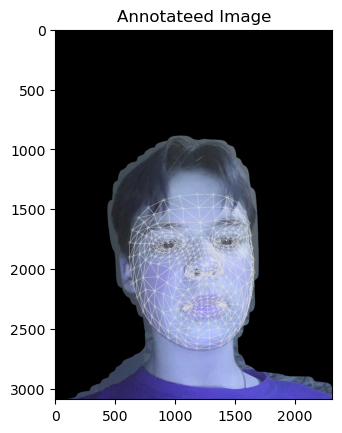

In [205]:
import cv2
import mediapipe as mp
im_path = r"/Users/joeljohnson/Desktop/Joel/data/Face_Segments/img/060038_4_028466_MALE_19.jpg"
def extractDominantColor(image, number_of_colors=8, hasThresholding=True):

    # Quick Fix Increase cluster counter to neglect the black(Read Article)
    if hasThresholding == True:
        number_of_colors += 1

    # Taking Copy of the image
    img = image.copy()

    # Convert Image into RGB Colours Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0]*img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img, sample_weight=None)

    # Get Colour Information
    colorInformation = getColorInformation(
        estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
drawing_spec = mp_drawing.DrawingSpec(thickness=25, circle_radius=0.1)
drawing_spec2 = mp_drawing.DrawingSpec(thickness=1, circle_radius=10)
image = cv2.imread(im_path, cv2.IMREAD_COLOR)
#cropped face
faces = face_detection_calculator.process(image)
# Crop the image based on the face detection results.
box = faces.detections[0].location_data.relative_bounding_box
x = box.xmin
x = int(x * image.shape[1])
y = box.ymin
y = int(y * image.shape[0])
w = box.width
w = int(w * image.shape[1])
h = box.height
h = int(h * image.shape[0])
print(x,y,w,h)
cropped  = image[y:y+h, x:x+w] # cropped

annotated_image = np.empty_like(image)
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:

    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    outside_contour = np.zeros_like(image)
    
    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'

          #print outter face landmarks
      )
    if results.face_landmarks:
        annotated_image = image.copy()
        contours = np.zeros_like(image)
        contours2 = np.zeros_like(image)
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = (0, 0, 0)
        annotated_image = np.where(condition, annotated_image, bg_image)
        # Draw pose, left and right hands, and face landmarks on the image.
        mp_drawing.draw_landmarks(
            contours,
            #set line width to 10
            results.face_landmarks,
            mp_holistic.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=drawing_spec)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=drawing_spec2)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=drawing_spec2)

    # Plot pose world landmarks.
    # mp_drawing.plot_landmarks(
    #     results.pose_world_landmarks, results.pose_landmarks)

# xmin = results.face_landmarks.landmark[0].x*image_width
# xmax = results.face_landmarks.landmark[0].x*image_width
# ymin = results.face_landmarks.landmark[0].y*image_height
# ymax = results.face_landmarks.landmark[0].y*image_height
xmax = 0
xmin = 10900
ymax = 0
ymin = 11000
index = 0
for landmark in results.face_landmarks.landmark:
    print(index)
    index += 1
    if landmark.x < xmin:
        xmin = landmark.x*image_width
    if landmark.x > xmax:
        xmax = landmark.x*image_width
    if landmark.y < ymin:
        ymin = landmark.y*image_height
    if landmark.y > ymax:
        ymax = landmark.y*image_height

# print(xmin,xmax,ymin,ymax)

#original face
plt.imshow(image)
plt.title("cropped image")
plt.show()

#contours
plt.imshow(contours)
plt.title("contours")
plt.show()

mask = results.segmentation_mask
plt.imshow(mask, cmap="binary")
plt.title("Mask")
plt.show()
# apply mask to the original image
mask = np.stack((mask,)*3, axis=-1)
mask = mask * 255
mask = mask.astype(np.uint8)
masked_image = cv2.bitwise_and(image, mask)
# save the result
plt.imshow(masked_image)
plt.title("Masked Image")
plt.show()
plt.imshow(annotated_image)
plt.title("Annotateed Image")
plt.show()

# Find the dominant color. Default is 1 , pass the parameter 'number_of_colors=N' where N is the specified number of colors
# dominantColors = extractDominantColor(annotated_image, hasThresholding=True)

# # Show in the dominant color information
# print("Color Information")
# prety_print_data(dominantColors)

# # Show in the dominant color as bar
# colour_bar = plotColorBar(dominantColors)
# plt.subplot(3, 1, 3)
# plt.axis("off")
# plt.imshow(colour_bar)
# plt.title("Color Bar")

# plt.show()

# print(dominantColors)



In [226]:
LIPS = frozenset([
    # Lips.
    (61, 146),
    (146, 91),
    (91, 181),
    (181, 84),
    (84, 17),
    (17, 314),
    (314, 405),
    (405, 321),
    (321, 375),
    (375, 291),
    (61, 185),
    (185, 40),
    (40, 39),
    (39, 37),
    (37, 0),
    (0, 267),
    (267, 269),
    (269, 270),
    (270, 409),
    (409, 291),
    (78, 95),
    (95, 88),
    (88, 178),
    (178, 87),
    (87, 14),
    (14, 317),
    (317, 402),
    (402, 318),
    (318, 324),
    (324, 308),
    (78, 191),
    (191, 80),
    (80, 81),
    (81, 82),
    (82, 13),
    (13, 312),
    (312, 311),
    (311, 310),
    (310, 415),
    (415, 308)])
LEFT_EYE = frozenset([
    # Left eye.
    (263, 249),
    (249, 390),
    (390, 373),
    (373, 374),
    (374, 380),
    (380, 381),
    (381, 382),
    (382, 362),
    (263, 466),
    (466, 388),
    (388, 387),
    (387, 386),
    (386, 385),
    (385, 384),
    (384, 398),
    (398, 362) ])
LEFT_EYEBROW = frozenset([
    # Left eyebrow.
    (276, 283),
    (283, 282),
    (282, 295),
    (295, 285),
    (300, 293),
    (293, 334),
    (334, 296),
    (296, 336) ])
RIGHT_EYE = frozenset([
    # Right eye.
    (33, 7),
    (7, 163),
    (163, 144),
    (144, 145),
    (145, 153),
    (153, 154),
    (154, 155),
    (155, 133),
    (33, 246),
    (246, 161),
    (161, 160),
    (160, 159),
    (159, 158),
    (158, 157),
    (157, 173),
    (173, 133) ])
RIGHT_EYEBROW = frozenset([
    # Right eyebrow.
    (46, 53),
    (53, 52),
    (52, 65),
    (65, 55),
    (70, 63),
    (63, 105),
    (105, 66),
    (66, 107) ])
FACE_OVAL = frozenset([
    # Face oval.
    (10, 338),
    (338, 297),
    (297, 332),
    (332, 284),
    (284, 251),
    (251, 389),
    (389, 356),
    (356, 454),
    (454, 323),
    (323, 361),
    (361, 288),
    (288, 397),
    (397, 365),
    (365, 379),
    (379, 378),
    (378, 400),
    (400, 377),
    (377, 152),
    (152, 148),
    (148, 176),
    (176, 149),
    (149, 150),
    (150, 136),
    (136, 172),
    (172, 58),
    (58, 132),
    (132, 93),
    (93, 234),
    (234, 127),
    (127, 162),
    (162, 21),
    (21, 54),
    (54, 103),
    (103, 67),
    (67, 109),
    (109, 10)
])
